In [2]:
import pandas as pd
from haversine import haversine
from datetime import date
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import neighbors
from sklearn.linear_model import LinearRegression as lr
from sklearn import linear_model
from lineartree import LinearTreeRegressor as ltr
from lineartree import LinearForestRegressor as lfr
from lineartree import LinearBoostRegressor as lbr
from statistics import mean
from math import sqrt

mine_name = "Morenci"
mine_file = mine_name + "_Mine.csv"
water_file = "Arizona_pH.csv"

coords_key = {"Morenci" : (33.0635, -109.3353), "Bagdad" : (34.5847, -113.2111), "Ray" : (33.1301, -110.9790), "Safford" : (32.9462, -109.6496)}
coords = coords_key[mine_name]

mine = pd.read_csv("cleaned data/" + mine_file)
water = pd.read_csv("cleaned data expanded/" + water_file)
water['date'] = pd.to_datetime(water['date'])
mine['date'] = pd.to_datetime(mine['date'])

print(mine)
print(water)

# function to convert date to integer
def dt_to_int(dt):
    return 365*dt.year + 30*(dt.month - 1) + dt.day

# function to generate list of production quarters in range of years
md = [[3, 31], [6, 30], [9, 30], [12, 31]]
def quarters(start, end, safe):
    qtrs = []
    for i in range(start, end + 1):
        for j in range(0, 4):
            dt = date(i, md[j][0], md[j][1])
            if (dt_to_int(dt) in minedict) or (not safe):
                qtrs.append([dt_to_int(dt), dt])
    return np.array(qtrs)

          date  mining   plant  office
0   2021-12-31  861339  774680  151384
1   2021-09-30  884060  794960  157896
2   2021-06-30  861811  760023  149621
3   2021-03-31  788784  724664  145269
4   2020-12-31  761955  684120  137703
..         ...     ...     ...     ...
151 1984-03-31  123760  117520    6240
152 1983-12-31  148304  101680    5952
153 1983-09-30  166848  112101   10428
154 1983-06-30  146432  109056    7168
155 1983-03-31  145408  114176    7680

[156 rows x 4 columns]
            date           loc   latitude   longitude   res  unit
0     2009-06-15  FMYN_WQX-VR1  33.713780  111.652000  8.29  None
1     2009-09-17  FMYN_WQX-VR1  33.713780  111.652000  8.14  None
2     2009-07-29  FMYN_WQX-VR1  33.713780  111.652000  8.15  None
3     2009-07-29  FMYN_WQX-VR1  33.713780  111.652000  7.93  None
4     2009-06-15  FMYN_WQX-VR1  33.713780  111.652000  7.82  None
...          ...           ...        ...         ...   ...   ...
51359 1990-06-12  AZDEQ_SW-206  33.735611 -110

In [3]:
dist = {}  # distance from each location to mine
for row in water.itertuples():
    dist[row.loc] = haversine(coords, (row.latitude, row.longitude))
    
dist

{'FMYN_WQX-VR1': 11443.022809731254,
 'FMYN_WQX-VR5': 11450.429604238345,
 'FMYN_WQX-VR7': 11451.428572347297,
 'FMYN_WQX-VR9': 11455.238438201572,
 'COCOPAH_INDIAN-CUP 30': 500.4096914486365,
 'COCOPAH_INDIAN-CRN 40': 501.6157106611263,
 'COCOPAH_INDIAN-WHD 10': 501.79458689193274,
 'COCOPAH_INDIAN-CDN 31': 503.4965302167765,
 '21ARIZ_WQX-UGSFR019.04': 9.045838417836723,
 '21ARIZ_WQX-SRTON055.09': 211.20992259882783,
 '21ARIZ_WQX-SRTON053.87': 210.21022436131585,
 '21ARIZ_WQX-UGSFR006.42': 6.44513838983373,
 '21ARIZ_WQX-SRCRS002.25': 209.88758758958988,
 '21ARIZ_WQX-SRTON058.63': 215.066305337876,
 '21ARIZ_WQX-LCKNO-NLS': 221.84469266891244,
 '21ARIZ_WQX-LCWIS-A': 199.29590747024744,
 '21ARIZ_WQX-SRTON062.89': 219.30651729103562,
 '21ARIZ_WQX-SRSAG-B': 207.1233269043407,
 '21ARIZ_WQX-SRROO-C2': 187.70947315984958,
 '21ARIZ_WQX-VRBAR-A': 228.64567401101888,
 '21ARIZ_WQX-SRSAG-A': 212.06167332603948,
 '21ARIZ_WQX-SRAPA-C': 183.10489516395097,
 '21ARIZ_WQX-SRTON057.70': 213.8494532413955

In [4]:
# generate set of unique locations
# locations are designated by distance to mine
locations = set()
locations_list = []
for row in water.itertuples():
    locations.add(dist[row.loc])
    locations_list.append(dist[row.loc])
    
# add distance to mine as a property
water['distance'] = locations_list
    
locations, locations_list

({6.44513838983373,
  6.537674403338435,
  9.045838417836723,
  9.687267789703524,
  11.218412011111576,
  23.001409456170233,
  23.097071507446216,
  23.10977671925572,
  27.135169071257955,
  28.404266069850067,
  28.570360493128483,
  29.64751903589359,
  48.0647092775647,
  48.48536603001206,
  49.492959691434244,
  51.45693078616468,
  58.974721364332616,
  70.92565153121332,
  71.62866791836828,
  72.91546385649411,
  78.27684584248685,
  83.49710437113025,
  84.43173964279005,
  87.99724268647469,
  88.00544771195871,
  88.26524433472991,
  90.8178886882987,
  91.93925174063035,
  94.42732035486793,
  95.49502015891397,
  101.5167913587557,
  103.69159199879537,
  104.13698466206156,
  105.88633115243734,
  107.21661675304328,
  107.70144839911858,
  110.4898432341201,
  111.27157070199117,
  111.48586129745993,
  112.21654838767734,
  114.59136204908357,
  115.60773055252159,
  116.46880143638293,
  117.62562703671755,
  120.33510832665333,
  121.07002694052808,
  124.265940505

In [5]:
minedict = {}  # hours recorded for each quarter
for row in mine.itertuples():
    key = dt_to_int(row.date)
    minedict[key] = [row.mining + row.plant, key]
    
minedict

{738026: [1636019, 738026],
 737935: [1679020, 737935],
 737845: [1621834, 737845],
 737756: [1513448, 737756],
 737661: [1446075, 737661],
 737570: [1544471, 737570],
 737480: [1645799, 737480],
 737391: [1739130, 737391],
 737296: [1713239, 737296],
 737205: [1804572, 737205],
 737115: [1742202, 737115],
 737026: [1688422, 737026],
 736931: [1693707, 736931],
 736840: [1736398, 736840],
 736750: [1696327, 736750],
 736661: [960734, 736661],
 736566: [1533186, 736566],
 736475: [1595042, 736475],
 736385: [1557800, 736385],
 736296: [1517766, 736296],
 736201: [1464125, 736201],
 736110: [1540607, 736110],
 736020: [1488720, 736020],
 735931: [1469249, 735931],
 735836: [1566622, 735836],
 735745: [1561961, 735745],
 735655: [1507396, 735655],
 735566: [1444823, 735566],
 735471: [1446727, 735471],
 735380: [1486734, 735380],
 735290: [1427778, 735290],
 735201: [1392785, 735201],
 735106: [1315170, 735106],
 735015: [1299043, 735015],
 734925: [1308692, 734925],
 734836: [1234567, 73

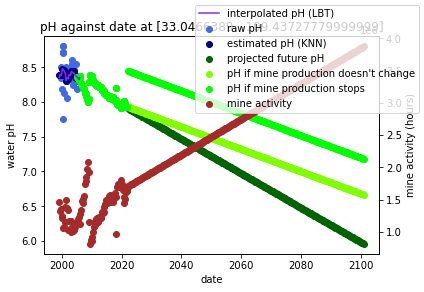

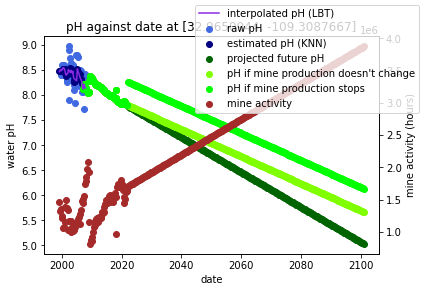

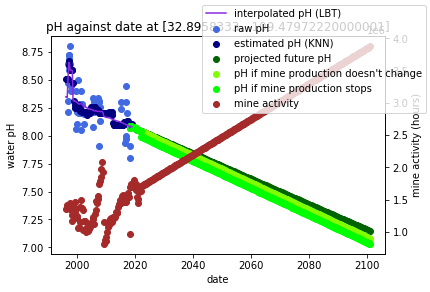

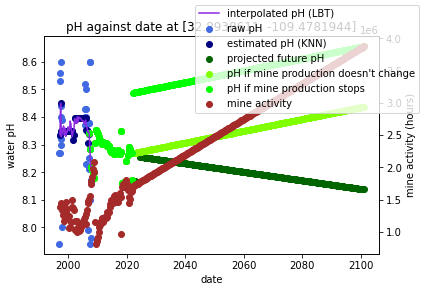

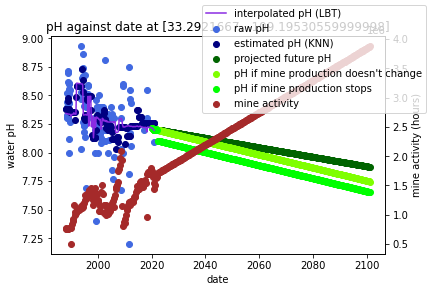

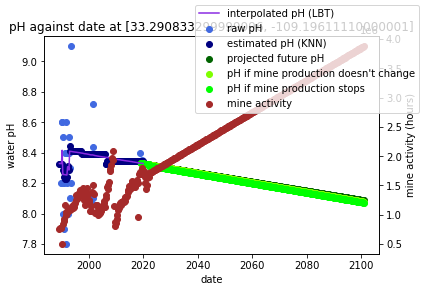

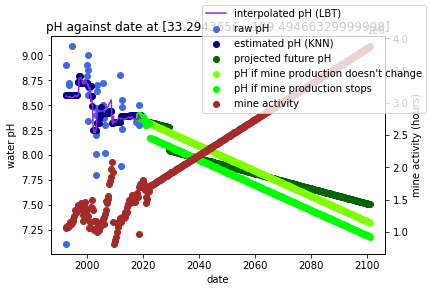

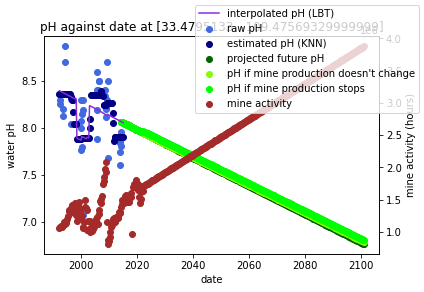

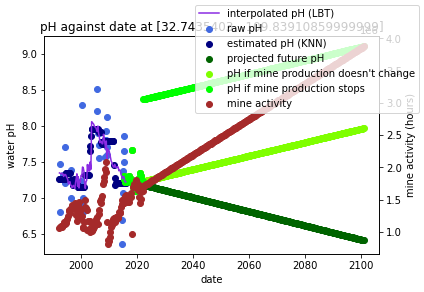

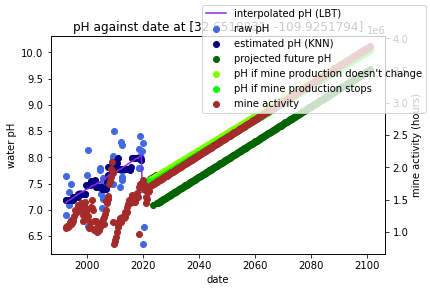

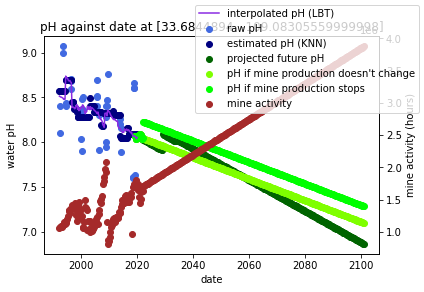

In [14]:
# create Linear Forest Regression model
lin_reg = linear_model.LinearRegression()
tree = lbr(base_estimator = lin_reg, loss = "square", min_samples_split = 2, n_estimators = 5)

correlations = []
obs = []

final_year = 2100

# run model
for d in locations:
    current = water[water['distance'] == d]

    if d > 75:  # only use locations within 75 km of the mine
        continue
    
    pH = []
    
    lat_long = []
    for row in current.itertuples():
        pH.append([dt_to_int(row.date), row.date, row.res])
        lat_long = [row.latitude, row.longitude]
    
    # generate list of production quarters in range of measurements
    pH.sort()
    start_year = pH[0][1].year
    end_year = pH[-1][1].year
    qtrs = quarters(start_year, end_year, True)

    # skip locations without enough data
    if len(qtrs) < 20 or len(pH) < 20:
        continue

    qtrs_int = qtrs[:,0]
    qtrs_date = qtrs[:,1]

    # skip locations without recent data
    if end_year < 2005:
        continue

    # format dataset for KNN
    x = []
    y = []
    dates = []

    for i in range(0, len(pH)):
        x.append(pH[i][0])
        y.append(pH[i][2])
        dates.append(pH[i][1])
    
    fig, ax1 = plt.subplots()
    ax1.scatter(dates, y, label = 'raw pH', color = 'royalblue')
    x = np.array(x).reshape(-1, 1)
    qtrs_int = np.array(qtrs_int).reshape(-1, 1)

    # interpolate water pH with KNN
    knn = neighbors.KNeighborsRegressor(7, weights = 'uniform')
    inter = knn.fit(x, y).predict(qtrs_int)
    
    x = qtrs
    y = inter
    ax1.scatter(qtrs_date, y, label = 'estimated pH (KNN)', color = 'navy')
    
    # collect mining data per production quarter
    X = []
    for i in range(0, len(x)):
        X.append(minedict[x[i][0]])
    
    # split data for training and testing
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    # fit model
    tree.fit(x_train, y_train)

    # calculate error and feature importance
    rsq_train = tree.score(x_train, y_train)
    rsq_test = tree.score(x_test, y_test)
    w = tree.coef_
    w = np.array([])
    
    # skip locations with low correlation
    if rsq_test < 0.2:
        plt.close('all')
        continue

    error_test = abs(tree.predict(x_test) - y_test)
    mse = np.square(error_test).mean()
    
    # model future mine activity values
    reg = lr()
    
    mine_x = []
    mine_y = []
    for key in minedict:
        mine_x.append([key])
        mine_y.append(minedict[key][0])
    
    reg.fit(mine_x, mine_y)
    future = quarters(end_year, final_year, False)
    future_int = future[:,0]
    future_date = future[:,1]
    future_int = future_int.reshape(-1, 1)
    future_mine = reg.predict(future_int)
    new_minedict = {}
    latest = 0
    for i in range(0, len(future_int)):
        key = future_int[i][0]
        if key not in minedict:
            new_minedict[key]= future_mine[i]
        else:
            latest = key

    # predict future water pH levels
    future_x = []
    constant_x = []
    zero_x = []
    for i in range(0, len(future_mine)):
        key = future_int[i][0]
        if key in minedict:
            future_x.append([minedict[key][0], key])
            constant_x.append([minedict[key][0], key])
            zero_x.append([minedict[key][0], key])
        else:
            future_x.append([new_minedict[key], key])
            constant_x.append([minedict[latest][0], key])
            zero_x.append([0, key])
    tree.fit(X, y)
    future_water = tree.predict(future_x)
    future_constant = tree.predict(constant_x)
    future_zero = tree.predict(zero_x)
    
    # collect aggregated mine values
    all_years = quarters(start_year, final_year, False)
    all_mine_date = all_years[:,1]
    all_mine_y = []
    for dt in all_mine_date:
        key = dt_to_int(dt)
        if key in minedict:
            all_mine_y.append(minedict[key][0])
        else:
            all_mine_y.append(new_minedict[key])

    # plot results
    result_full = tree.predict(X)
    plt.plot(qtrs_date, result_full, label = "interpolated pH (LBT)", color = "blueviolet")
    ax1.scatter(future_date, future_water, label = "projected future pH", color = 'darkgreen')
    ax1.scatter(future_date, future_constant, label = "pH if mine production doesn't change", color = 'chartreuse')
    ax1.scatter(future_date, future_zero, label = "pH if mine production stops", color = 'lime')
    ax2 = ax1.twinx()
    ax2.scatter(all_mine_date, all_mine_y, color = 'brown', label = "mine activity")
    plt.title('pH against date at ' + str(lat_long))
    ax1.set_xlabel('date')
    ax1.set_ylabel('water pH')
    ax2.set_ylabel('mine activity (hours)')
    #ax1.legend()
    #ax2.legend()
    fig.legend()
    plt.show()
    plt.close('all')

    # add results to array
    correlations.append([d, rsq_train, rsq_test, w.tolist(), mse, future_water[-1], future_constant[-1], future_zero[-1]])
    obs.append([d, lat_long, future_water[0], future_water[-1]])

In [15]:
#[lat_long, future_water[0], future_water[-1]]

obs.sort(reverse = True, key= lambda x: x[-1])
list(map(print, obs))

[71.62866791836828, [32.6518831, -109.9251794], 7.519039, 9.676609]
[23.097071507446216, [32.8938611, -109.4781944], 8.340733, 8.137662]
[28.404266069850067, [33.290833299999996, -109.19611110000001], 8.331058, 8.087471]
[28.570360493128483, [33.2921667, -109.19530559999998], 8.214351, 7.873973]
[29.64751903589359, [33.2943656, -109.49466329999998], 8.402853, 7.506052]
[23.001409456170233, [32.8958333, -109.47972220000001], 8.067146, 7.144909]
[72.91546385649411, [33.6844894, -109.08305559999998], 8.065556, 6.8612843]
[48.0647092775647, [33.4795133, -109.47569329999999], 8.069223, 6.7678013]
[58.974721364332616, [32.7435403, -109.83910859999999], 7.2962017, 6.4099827]
[9.687267789703524, [33.0466389, -109.43727779999999], 8.355698, 5.958515]
[11.218412011111576, [32.9650944, -109.3087667], 8.114395, 5.031021]


[None, None, None, None, None, None, None, None, None, None, None]

In [26]:
#[lat_long, future_water[0], future_water[-1]]

obs.sort(reverse = True, key= lambda x: x[-1])
list(map(print, obs))

[71.62866791836828, [32.6518831, -109.9251794], 7.519039, 8.318981]
[28.404266069850067, [33.290833299999996, -109.19611110000001], 8.331058, 8.20654]
[23.097071507446216, [32.8938611, -109.4781944], 8.340733, 8.1994915]
[28.570360493128483, [33.2921667, -109.19530559999998], 8.214351, 8.04016]
[29.64751903589359, [33.2943656, -109.49466329999998], 8.402853, 7.807741]
[23.001409456170233, [32.8958333, -109.47972220000001], 8.067146, 7.5997925]
[72.91546385649411, [33.6844894, -109.08305559999998], 8.065556, 7.5585995]
[48.0647092775647, [33.4795133, -109.47569329999999], 8.069223, 7.367489]
[9.687267789703524, [33.0466389, -109.43727779999999], 8.355698, 6.947918]
[58.974721364332616, [32.7435403, -109.83910859999999], 7.2962017, 6.800638]
[11.218412011111576, [32.9650944, -109.3087667], 8.114395, 6.423977]


[None, None, None, None, None, None, None, None, None, None, None]

# Locations

* 32.6518831, -109.9251794 => Grant Creek
* 33.290833299999996, -109.19611110000001 => Blue River
* 32.8938611, -109.4781944 => Gila River
* 33.2921667, -109.19530559999998 => Blue River
* 33.2943656, -109.49466329999998 => Eagle Creek
* 32.8958333, -109.47972220000001 => Gila River
* 33.6844894, -109.08305559999998 => Blue River
* 33.4795133, -109.47569329999999 => Eagle Creek
* 33.0466389, -109.43727779999999 => Eagle Creek
* 32.7435403, -109.83910859999999 => stream that leads to Frye Mesa Reservoir Lakes
* 32.9650944, -109.3087667 => Gila River

Gila River: 1, 6, 9    => Privately owned chunks, https://wrrc.arizona.edu/gila/can-i-use-water-out-gila-river
Stream Thing: 2        => Common ground, fishing, https://www.outdoorproject.com/united-states/arizona/frye-mesa-reservoir
Eagle Creek: 3, 4, 7   => Source of water for mines, also camping/fish populations, (WIKI fish) + https://www.visitgreenleecounty.com/uncategorized/lower-eagle-creek-road/
Blue River: 5, 8, 10   => "To date, 216 species have been documented in this IBA with 138 likely breeding.", https://aziba.org/?page_id=291
Grant Creek: 11        => General Public use again, https://az-tu.org/conservation-grant-creek/

Why to protect biodiversity => https://ec.europa.eu/environment/nature/biodiversity/intro/index_en.htm#:~:text=Healthy%20ecosystems%20clean%20our%20water,civilisation%20and%20sustain%20our%20economies

Most living organisms, especially aquatic life, function at the optimal pH range of 6.5 to 8.5. => https://www.epa.gov/national-aquatic-resource-surveys/indicators-acidification

https://clu-in.org/conf/tio/srpwir4_072116/Arizona-Know-Your-Water-UAz.pdf => ????